In [ ]:
import pandas as pd
import re
import string
import math
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# import dataset from local computer
from google.colab import files
uploaded = files.upload()


Saving DatasetPulp.xlsx to DatasetPulp.xlsx


In [ ]:
df=pd.read_excel('DatasetPulp.xlsx')
df

,Nomor PEB,Tanggal,Barang,Kode Barang,Jumlah Kms Brg,Jenis Kms Brg,Produksi,Jenis Satuan,Jml Container,Pelabuhan Muat,Pelabuhan Bongkar,Negara Penerima
0,1,2022-01-01,NAPKIN TISSUE BASIS WEIGHT 18 GSM +/-0.5NAPKIN...,48183000,136.00,RO,16.885,TNE,1,IDPWG,TWKHH,TW
1,2,2022-01-01,NAPKIN TISSUE,48183000,908.00,RO,155.093,TNE,16,IDPWG,GRSKG,GR
2,3,2022-01-01,JUMBO ROLL TISSUE,48183000,484.00,RO,156.500,TNE,21,IDPWG,KRPUS,KR
3,4,2022-01-01,FACIAL TISSUE,48181000,4.39,BL,160.148,TNE,3,IDPWG,AUBNE,AU
4,5,2022-01-01,MULTI PURPOSE TISSUE,48183000,244.00,RO,160.148,TNE,3,IDPWG,VNCLI,VN
...,...,...,...,...,...,...,...,...,...,...,...,...
3776,3777,2022-12-31,JUMBO KITCHEN TOWEL TISSUE PP ORIGINAL000,48183000,54.00,RO,150.035,TNE,3,IDPWG,USLGB,US
3777,3778,2022-12-31,JUMBO KITCHEN TOWEL TISSUE PP ORIGINAL000,48183000,54.00,RO,150.035,TNE,3,IDPWG,USLGB,US
3778,3779,2022-12-31,JUMBO ROLL TISSUE,48183000,80.00,RO,169.635,TNE,2,IDPWG,KRICH,KR
3779,3780,2022-12-31,JUMBO TOILET TISSUE IN REELS,48183000,126.00,RO,97.740,TNE,7,IDPWG,ZADUR,ZA


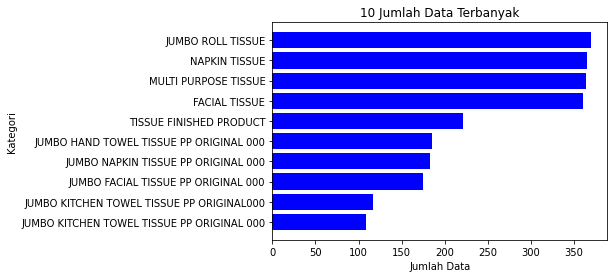

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# membaca file csv
df = pd.read_excel('DatasetPulp.xlsx')

# membuat dataframe baru untuk menghitung jumlah data yang sama di kolom
count_df = pd.DataFrame({'count': df.groupby(['Barang']).size()}).reset_index()

# mengurutkan dataframe berdasarkan jumlah data terbanyak dan mengambil 10 nilai teratas
top_10_counts = count_df.sort_values('count', ascending=False).head(10)

# membuat plot diagram batang
plt.barh(top_10_counts['Barang'], top_10_counts['count'], color='blue')

# menambahkan label pada sumbu x dan y
plt.xlabel('Jumlah Data')
plt.ylabel('Kategori')

# menambahkan judul diagram
plt.title('10 Jumlah Data Terbanyak')

# membalikkan sumbu x agar diagram batang ke kanan
plt.gca().invert_yaxis()

# menampilkan diagram
plt.show()

In [ ]:
df.columns

Index(['Nomor PEB', 'Tanggal', 'Barang', 'Kode Barang', 'Jumlah Kms Brg',
       'Jenis Kms Brg', 'Produksi', 'Jenis Satuan', 'Jml Container',
       'Pelabuhan Muat', 'Pelabuhan Bongkar', 'Negara Penerima'],
      dtype='object')

In [ ]:
df=df.query('Barang == "FACIAL TISSUE"')
df

,Nomor PEB,Tanggal,Barang,Kode Barang,Jumlah Kms Brg,Jenis Kms Brg,Produksi,Jenis Satuan,Jml Container,Pelabuhan Muat,Pelabuhan Bongkar,Negara Penerima
3,4,2022-01-01,FACIAL TISSUE,48181000,4.390,BL,160.148,TNE,3,IDPWG,AUBNE,AU
8,9,2022-01-02,FACIAL TISSUE,48181000,NaN,NaN,160.565,TNE,3,IDPWG,AUFRE,AU
12,13,2022-01-03,FACIAL TISSUE,48181000,NaN,NaN,161.180,TNE,4,IDPWG,TWTXG,TW
17,18,2022-01-04,FACIAL TISSUE,48182000,5.200,CT,161.482,TNE,4,IDPWG,NZAKL,NZ
35,36,2022-01-05,FACIAL TISSUE,48181000,939.000,CT,164.448,TNE,1,IDPWG,AUBNE,AU
...,...,...,...,...,...,...,...,...,...,...,...,...
3680,3680,2022-12-26,FACIAL TISSUE,48182000,6.200,CT,170.638,TNE,5,IDPWG,AUBNE,AU
3701,3702,2022-12-28,FACIAL TISSUE,48181000,1.056,CT,170.035,TNE,1,IDPWG,AUBNE,AU
3717,3718,2022-12-29,FACIAL TISSUE,48181000,1.820,BL,172.170,TNE,1,IDPWG,AUMEL,AU
3727,3728,2022-12-30,FACIAL TISSUE,48181000,1.056,CT,170.974,TNE,1,IDPWG,AUMEL,AU


In [ ]:
df = df[['Tanggal','Produksi']]
df.dtypes

Tanggal     datetime64[ns]
Produksi           float64
dtype: object

In [ ]:
df['Tanggal']= pd.to_datetime(df.Tanggal)
df['Produksi'] = df['Produksi'].astype(float)

<ipython-input-163-61c2c543ce37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal']= pd.to_datetime(df.Tanggal)
<ipython-input-163-61c2c543ce37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Produksi'] = df['Produksi'].astype(float)


In [ ]:
df.dtypes

Tanggal     datetime64[ns]
Produksi           float64
dtype: object

In [ ]:
df.index = df.pop('Tanggal')
df

,Produksi
Tanggal,
2022-01-01,160.148
2022-01-02,160.565
2022-01-03,161.180
2022-01-04,161.482
2022-01-05,164.448
...,...
2022-12-26,170.638
2022-12-28,170.035
2022-12-29,172.170


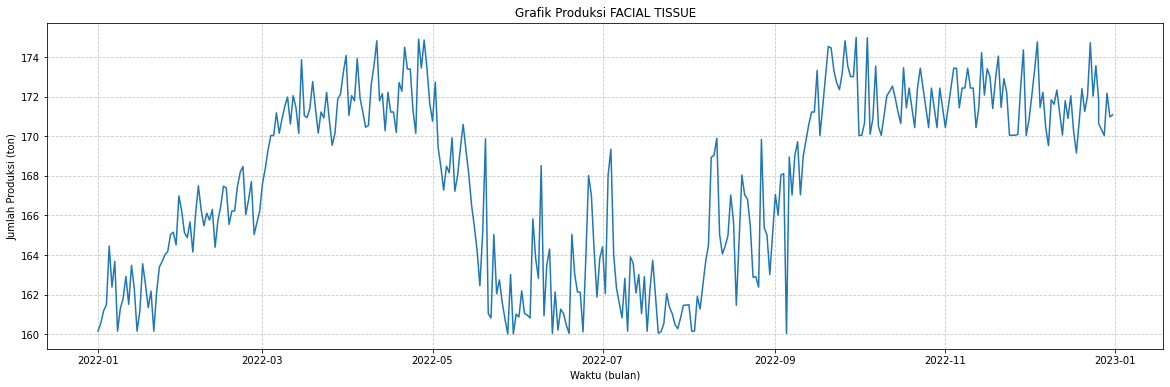

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df.index, df['Produksi'])
ax.set_xlabel('Waktu (bulan)')
ax.set_ylabel('Jumlah Produksi (ton)')
ax.set_title('Grafik Produksi FACIAL TISSUE')
ax.grid(linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.shape

(361, 1)

In [ ]:
#scalling
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [ ]:
# split data
train_size = int(len(df) * 0.75)
test_size = len(df) - train_size
train = df[0:train_size,:]
test = df[train_size:len(df),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 270, test size: 91 


In [ ]:
# menentukan timestamp
time_stemp = 1
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [ ]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# melatih model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
268/268 [==============================] - 3s 3ms/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 2/50
268/268 [==============================] - 1s 3ms/step - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 3/50
268/268 [==============================] - 1s 2ms/step - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 4/50
268/268 [==============================] - 1s 3ms/step - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 5/50
268/268 [==============================] - 1s 3ms/step - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 6/50
268/268 [==============================] - 1s 3ms/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 7/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 8/50
268/268 [==============================] - 1s 4ms/step - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 9/50
268/268 [==============================] - 1s 2ms/step - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 10/5

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 10)                480       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score FACIAL TISSUE : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score FACIAL TISSUE : %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 6ms/step
Train Score FACIAL TISSUE : 2.09 RMSE
Test Score FACIAL TISSUE : 1.94 RMSE


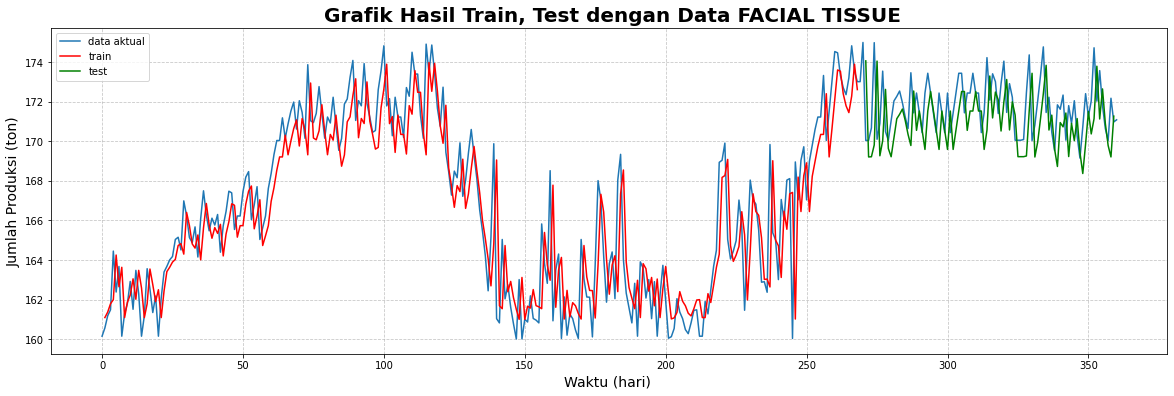

In [ ]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(df)-1, :] = testPredict
plt.figure(figsize=(20,6))
plt.plot(scaler.inverse_transform(df),label='data aktual')
plt.plot(trainPredictPlot,color='red',label='train')
plt.plot(testPredictPlot,color='green',label='test')
plt.title(' Grafik Hasil Train, Test dengan Data FACIAL TISSUE', fontsize=20 , fontweight='bold')
plt.xlabel('Waktu (hari) ', fontsize=14)
plt.ylabel('Jumlah Produksi (ton)', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

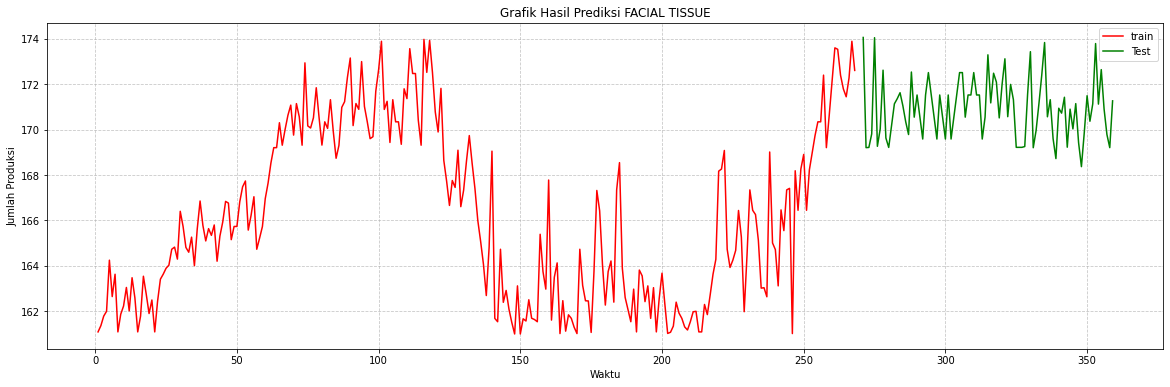

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(trainPredictPlot,color='red',label='train')
plt.plot(testPredictPlot,color='green',label='Test')
plt.title('Grafik Hasil Prediksi FACIAL TISSUE')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Produksi')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()